In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [59]:
def distnace(Centeriods,Point):
    return np.sum((Centeriods-Point)**2,axis = 1)

def compute_total_cost(Points, Clusters, Centroids):
    total_cost = 0
    for i, point in enumerate(Points):
        centroid = Centroids[Clusters[i]]
        total_cost += np.sum((point - centroid) ** 2)
    return total_cost

def Kmeans(Points,k = 3,MaxItrations = 200,tris = 100):
    BestClusters = np.array([])
    BestCenteriods = np.array([])
    for t in range(tris):
        Clusters = []
        Centeriods = np.random.uniform(np.amin(Points,axis=0),np.amax(Points,axis=0),size=(k,Points.shape[1]))
        for _ in range(MaxItrations):
            for point in Points:
                distnces = distnace(Centeriods,point)
                Clusters.append(np.argmin(distnces).astype(int))

            NewCenteriods = []
            for i in range(k):
                cluster_points = Points[Clusters == i]  
                if len(cluster_points) > 0:
                    NewCenteriods.append(np.mean(cluster_points, axis=0))
                else:
                    NewCenteriods.append(Points[np.random.randint(0, len(Points))])
            
            if np.mean(Centeriods- np.array(NewCenteriods))<.0001:
                break
            Centeriods = np.array(NewCenteriods)
        if  len(BestClusters)==0 or compute_total_cost(Points, Clusters, Centeriods) < compute_total_cost(Points, BestClusters, BestCenteriods) :
            BestClusters = Clusters
            BestCenteriods = Centeriods
    return BestClusters

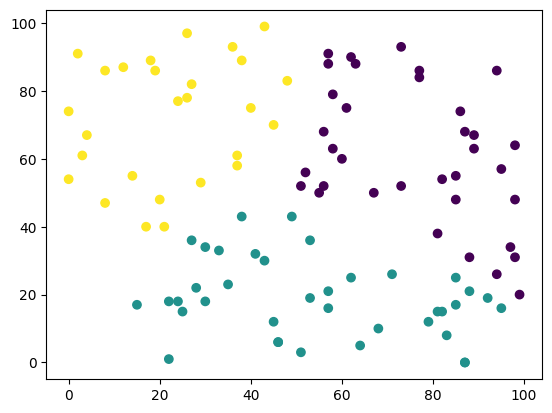

In [60]:
Points = np.random.randint(0,100,(100,2))
Clusters = Kmeans(Points)
plt.scatter(Points[:,0],Points[:,1],c=Clusters)
plt.show()